In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
stock=pd.read_csv("D:\CAREER\ANALYTICS\projects\Finclub Project\Reliance 1 day historical data 10 years.csv")

In [3]:
stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-01,450.777069,458.924866,447.433777,449.860779,422.221466,5487655.0
1,2013-11-05,447.433777,456.522614,447.433777,450.578949,422.895508,5056001.0
2,2013-11-06,450.727539,455.631073,443.273224,445.081085,417.735413,4439539.0
3,2013-11-07,445.279205,448.647278,436.908539,438.790710,411.831482,4519284.0
4,2013-11-08,438.840240,439.830841,431.484955,433.862427,407.206024,4040793.0
...,...,...,...,...,...,...,...
2462,2023-10-25,2250.050049,2281.199951,2243.000000,2257.949951,2257.949951,5810344.0
2463,2023-10-26,2251.000000,2258.000000,2220.300049,2226.500000,2226.500000,7611267.0
2464,2023-10-27,2240.000000,2273.500000,2235.949951,2265.800049,2265.800049,5885542.0
2465,2023-10-30,2274.000000,2325.000000,2269.949951,2312.500000,2312.500000,8406652.0


In [4]:
stock['Date']= pd.to_datetime(stock['Date'])

In [5]:
stock = stock.set_index(pd.DatetimeIndex(stock['Date'].values)) 

In [6]:
len(stock['Date'])

2467

In [7]:
stock.Date

2013-11-01   2013-11-01
2013-11-05   2013-11-05
2013-11-06   2013-11-06
2013-11-07   2013-11-07
2013-11-08   2013-11-08
                ...    
2023-10-25   2023-10-25
2023-10-26   2023-10-26
2023-10-27   2023-10-27
2023-10-30   2023-10-30
2023-10-31   2023-10-31
Name: Date, Length: 2467, dtype: datetime64[ns]

In [8]:
stock

,Date,Open,High,Low,Close,Adj Close,Volume
2013-11-01,2013-11-01,450.777069,458.924866,447.433777,449.860779,422.221466,5487655.0
2013-11-05,2013-11-05,447.433777,456.522614,447.433777,450.578949,422.895508,5056001.0
2013-11-06,2013-11-06,450.727539,455.631073,443.273224,445.081085,417.735413,4439539.0
2013-11-07,2013-11-07,445.279205,448.647278,436.908539,438.790710,411.831482,4519284.0
2013-11-08,2013-11-08,438.840240,439.830841,431.484955,433.862427,407.206024,4040793.0
...,...,...,...,...,...,...,...
2023-10-25,2023-10-25,2250.050049,2281.199951,2243.000000,2257.949951,2257.949951,5810344.0
2023-10-26,2023-10-26,2251.000000,2258.000000,2220.300049,2226.500000,2226.500000,7611267.0
2023-10-27,2023-10-27,2240.000000,2273.500000,2235.949951,2265.800049,2265.800049,5885542.0
2023-10-30,2023-10-30,2274.000000,2325.000000,2269.949951,2312.500000,2312.500000,8406652.0


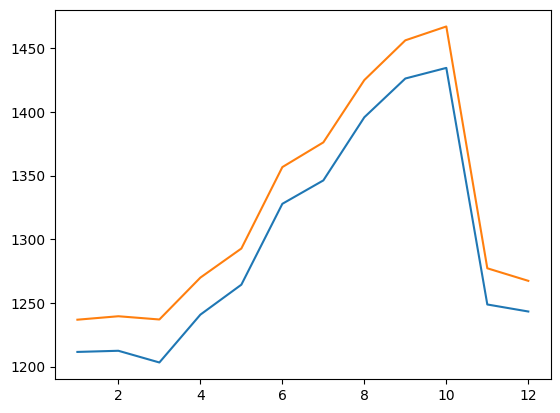

In [9]:
plt.plot(stock.groupby(stock.Date.dt.month)['Low'].mean())
plt.plot(stock.groupby(stock.Date.dt.month)['High'].mean())

Text(0, 0.5, 'Close Price')

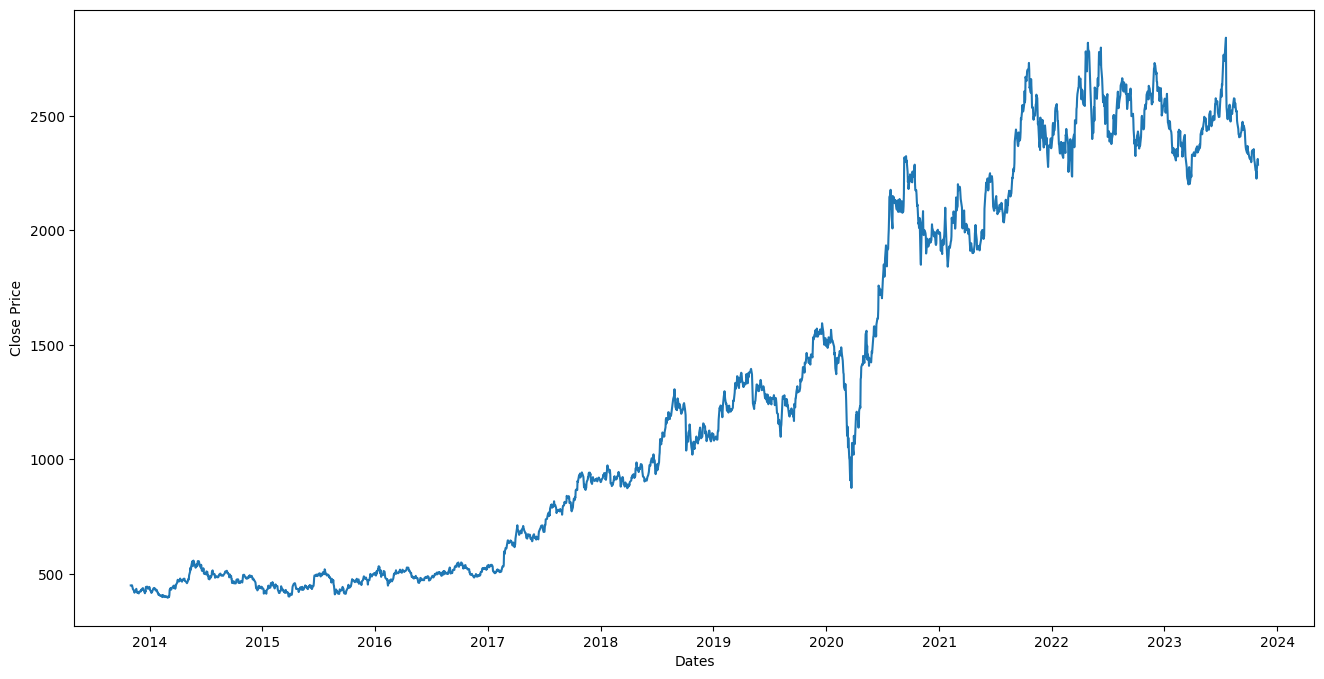

In [10]:
plt.figure(figsize=(16,8))
plt.plot(stock['Date'],stock['Close'])    #task asked in project 
plt.xlabel("Dates")
plt.ylabel("Close Price")

In [11]:
def SMA(data, period=50, column='Close'):
 return data[column].rolling(window=period).mean()

In [12]:
stock['SMA50']= SMA(stock)

In [66]:
# defining function buying below SMA and selling above SMA
def strategy(df):
  buy = []       # Create an empty list to store buy signals.
  sg=[]          # creating signal 1 for buy -1 for sell
  sell = []      # Create an empty list to store sell signals.
  flag = 0       # Initialize a flag variable to keep track of the trading state (0 means not holding a position).
  buy_price = 0  # Initialize a variable to store the buy price.
  initial_balance = 10000  # Initial capital
  balance = initial_balance
  stock_quantity = 0
  profit=[]

  for i in range(0, len(df)):
      if df['SMA50'][i] > df['Close'][i] and flag == 0:    # trading strategy if SMA50 > closing price then buying the stock as we know its price will go above SMA in future 
         buy.append(df['Close'][i])
         sell.append(np.nan)
         buy_price = df['Close'][i]
         sg.append(1)
         flag = 1
         stock_quantity = balance / df['Close'][i]
         balance = 0
         profit.append(0)
      elif df['SMA50'][i]< df['Close'][i] and flag == 1 and buy_price < df['Close'][i]:
         sell.append(df['Close'][i])
         sg.append(-1)
         buy.append(np.nan)
         profit.append((df['Close'][i]-buy_price)*stock_quantity)
         buy_price = 0
         flag = 0
         balance = stock_quantity * df['Close'][i]
         stock_quantity = 0
      else:
         sell.append(np.nan)
         buy.append(np.nan)
         sg.append(0)
         profit.append(0)
        
    
  final_portfolio_value = balance + stock_quantity * df['Close'].iloc[-1]
        
  return (buy, sell,sg,final_portfolio_value,profit)
    

In [92]:
stock['Buy']= strategy(stock)[0]
stock['Sell']= strategy(stock)[1]
stock['signal']= strategy(stock)[2]
final_portfolio= strategy(stock)[3]
stock['profit']= strategy(stock)[4]
final_portfolio

23655.82435296607

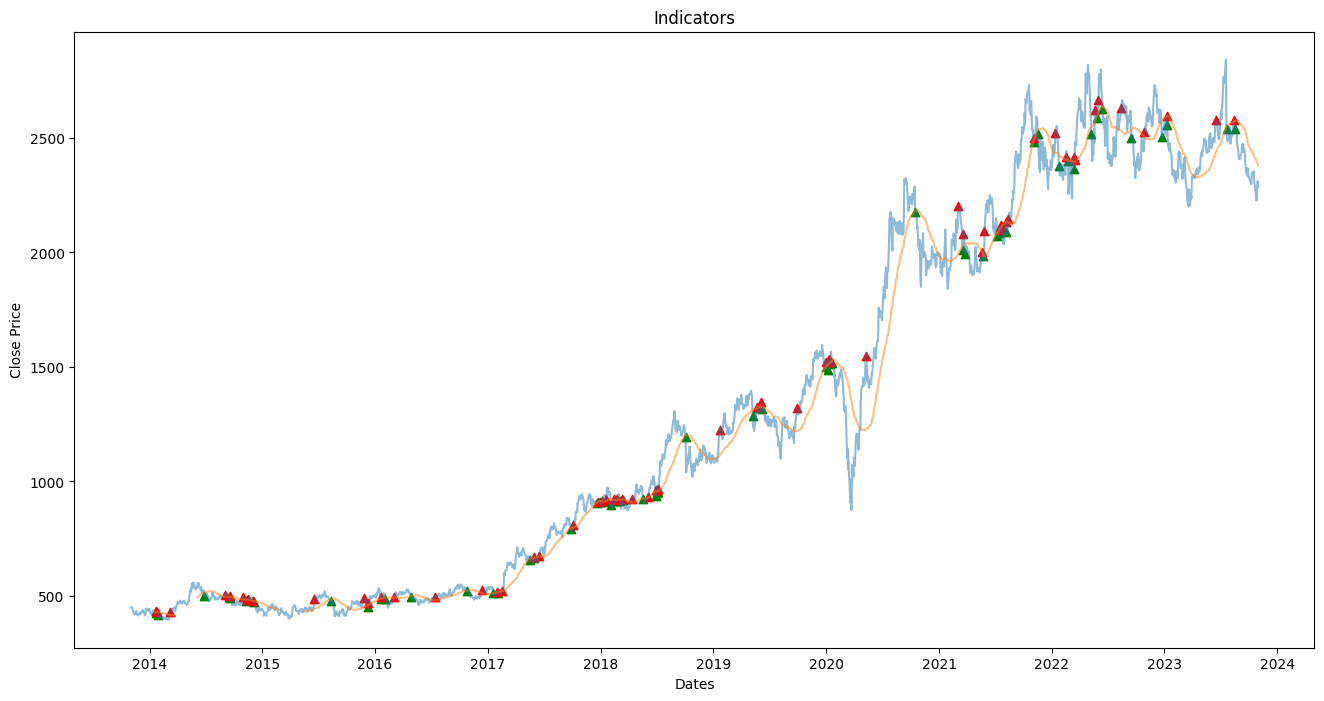

In [15]:
plt.figure(figsize=(16,8))
plt.title('Indicators')
plt.plot(stock['Close'],alpha =0.5, label= 'Close') 
plt.plot(stock['SMA50'],alpha =0.5, label= 'SMA50') 
plt.scatter(stock.index, stock['Buy'], color= 'green', label= 'Buy Signal', marker= '^', alpha = 1)
plt.scatter(stock.index, stock['Sell'], color= 'red', label= 'Sell Signal', marker= '^', alpha = 1)
plt.xlabel("Dates")
plt.ylabel("Close Price")
plt.show()

In [16]:
# Calculating Sharpe Ratio
#daily Returns
stock['returns']= stock['Adj Close'].pct_change(1)
#India Treasury Bills: Yield: 10 years(2013-2023) = 7.35%
risk_free_rate = 0.0735/2467 
# Calculate the excess returns 
stock['excess_returns']= stock['returns'] - risk_free_rate
#calculate the sharpe Ratio
sharpe_ratio = np.sqrt(248) * stock['excess_returns'].mean() / stock['excess_returns'].std()
#displaying the sharpe ratio
print('Sharpe Ratio:', sharpe_ratio)

Sharpe Ratio: 0.7232217286515639


In [17]:
# Calculate daily returns
stock['Daily_Return'] = stock['Adj Close'].pct_change() * 100

In [18]:
stock

,Date,Open,High,Low,Close,Adj Close,Volume,SMA50,Buy,Sell,signal,returns,excess_returns,Daily_Return
2013-11-01,2013-11-01,450.777069,458.924866,447.433777,449.860779,422.221466,5487655.0,NaN,NaN,NaN,0,NaN,NaN,NaN
2013-11-05,2013-11-05,447.433777,456.522614,447.433777,450.578949,422.895508,5056001.0,NaN,NaN,NaN,0,0.001596,0.001567,0.159642
2013-11-06,2013-11-06,450.727539,455.631073,443.273224,445.081085,417.735413,4439539.0,NaN,NaN,NaN,0,-0.012202,-0.012232,-1.220182
2013-11-07,2013-11-07,445.279205,448.647278,436.908539,438.790710,411.831482,4519284.0,NaN,NaN,NaN,0,-0.014133,-0.014163,-1.413318
2013-11-08,2013-11-08,438.840240,439.830841,431.484955,433.862427,407.206024,4040793.0,NaN,NaN,NaN,0,-0.011231,-0.011261,-1.123143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-25,2023-10-25,2250.050049,2281.199951,2243.000000,2257.949951,2257.949951,5810344.0,2403.170996,NaN,NaN,0,-0.002320,-0.002350,-0.231972
2023-10-26,2023-10-26,2251.000000,2258.000000,2220.300049,2226.500000,2226.500000,7611267.0,2396.757998,NaN,NaN,0,-0.013929,-0.013958,-1.392854
2023-10-27,2023-10-27,2240.000000,2273.500000,2235.949951,2265.800049,2265.800049,5885542.0,2390.528999,NaN,NaN,0,0.017651,0.017621,1.765104
2023-10-30,2023-10-30,2274.000000,2325.000000,2269.949951,2312.500000,2312.500000,8406652.0,2385.276001,NaN,NaN,0,0.020611,0.020581,2.061080


In [19]:
# Function for calculating annual returns
def a_r(df): 
    ar=0
    m_n=df['Daily_Return'].mean()/100
    s_td=df['Daily_Return'].std()/100
    daily_returns=np.random.normal(m_n, s_td, 2467)  #normal (Gaussian) distribution.
    # Calculate the total return
    total_return = np.prod(1 + daily_returns) - 1
    # Calculate the annualized return
    num_years = 10
    ar = (1 + total_return) ** (1 / num_years) - 1

    return ar

In [175]:
annual_return= a_r(stock)
print('annual return:', annual_return*100)


annual return: 12.740422905177562


In [21]:
stock

,Date,Open,High,Low,Close,Adj Close,Volume,SMA50,Buy,Sell,signal,returns,excess_returns,Daily_Return
2013-11-01,2013-11-01,450.777069,458.924866,447.433777,449.860779,422.221466,5487655.0,NaN,NaN,NaN,0,NaN,NaN,NaN
2013-11-05,2013-11-05,447.433777,456.522614,447.433777,450.578949,422.895508,5056001.0,NaN,NaN,NaN,0,0.001596,0.001567,0.159642
2013-11-06,2013-11-06,450.727539,455.631073,443.273224,445.081085,417.735413,4439539.0,NaN,NaN,NaN,0,-0.012202,-0.012232,-1.220182
2013-11-07,2013-11-07,445.279205,448.647278,436.908539,438.790710,411.831482,4519284.0,NaN,NaN,NaN,0,-0.014133,-0.014163,-1.413318
2013-11-08,2013-11-08,438.840240,439.830841,431.484955,433.862427,407.206024,4040793.0,NaN,NaN,NaN,0,-0.011231,-0.011261,-1.123143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-25,2023-10-25,2250.050049,2281.199951,2243.000000,2257.949951,2257.949951,5810344.0,2403.170996,NaN,NaN,0,-0.002320,-0.002350,-0.231972
2023-10-26,2023-10-26,2251.000000,2258.000000,2220.300049,2226.500000,2226.500000,7611267.0,2396.757998,NaN,NaN,0,-0.013929,-0.013958,-1.392854
2023-10-27,2023-10-27,2240.000000,2273.500000,2235.949951,2265.800049,2265.800049,5885542.0,2390.528999,NaN,NaN,0,0.017651,0.017621,1.765104
2023-10-30,2023-10-30,2274.000000,2325.000000,2269.949951,2312.500000,2312.500000,8406652.0,2385.276001,NaN,NaN,0,0.020611,0.020581,2.061080


In [22]:
# function for calculating Strategy returns


In [23]:
stock

,Date,Open,High,Low,Close,Adj Close,Volume,SMA50,Buy,Sell,signal,returns,excess_returns,Daily_Return
2013-11-01,2013-11-01,450.777069,458.924866,447.433777,449.860779,422.221466,5487655.0,NaN,NaN,NaN,0,NaN,NaN,NaN
2013-11-05,2013-11-05,447.433777,456.522614,447.433777,450.578949,422.895508,5056001.0,NaN,NaN,NaN,0,0.001596,0.001567,0.159642
2013-11-06,2013-11-06,450.727539,455.631073,443.273224,445.081085,417.735413,4439539.0,NaN,NaN,NaN,0,-0.012202,-0.012232,-1.220182
2013-11-07,2013-11-07,445.279205,448.647278,436.908539,438.790710,411.831482,4519284.0,NaN,NaN,NaN,0,-0.014133,-0.014163,-1.413318
2013-11-08,2013-11-08,438.840240,439.830841,431.484955,433.862427,407.206024,4040793.0,NaN,NaN,NaN,0,-0.011231,-0.011261,-1.123143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-25,2023-10-25,2250.050049,2281.199951,2243.000000,2257.949951,2257.949951,5810344.0,2403.170996,NaN,NaN,0,-0.002320,-0.002350,-0.231972
2023-10-26,2023-10-26,2251.000000,2258.000000,2220.300049,2226.500000,2226.500000,7611267.0,2396.757998,NaN,NaN,0,-0.013929,-0.013958,-1.392854
2023-10-27,2023-10-27,2240.000000,2273.500000,2235.949951,2265.800049,2265.800049,5885542.0,2390.528999,NaN,NaN,0,0.017651,0.017621,1.765104
2023-10-30,2023-10-30,2274.000000,2325.000000,2269.949951,2312.500000,2312.500000,8406652.0,2385.276001,NaN,NaN,0,0.020611,0.020581,2.061080


In [24]:
# calculating strategy returns.
def  strategy_return(df):

  # Initialize portfolio variables
  initial_balance = 10000  # Initial capital
  balance = initial_balance
  stock_quantity = 0

  # Calculate the strategy return
  for i in range(len(df)):
    if df['signal'][i] == 1 and balance > 0:
        # Buy signal: If there's a buy signal and available balance, buy the stock
        stock_quantity = balance / df['Close'][i]
        balance = 0
    elif df['signal'][i] == -1 and stock_quantity > 0:
        # Sell signal: If there's a sell signal and stocks to sell, sell the stocks
        balance = stock_quantity * df['Close'][i]
        stock_quantity = 0

  # Calculate the final portfolio value
  final_portfolio_value = balance + stock_quantity * df['Close'].iloc[-1]

  # Calculate the strategy return as a percentage
  strategy_return = (final_portfolio_value / initial_balance - 1) * 100
    
  return(strategy_return)


In [94]:
ret = strategy_return(stock) # percentage return
print('Strategy Return :', ret)

Strategy Return : 136.5582435296607


In [26]:
stock= stock.fillna(0)

In [27]:
# Define the benchmark symbol and date range
def bench_return(data):
  start_date = data['Date'].iloc[0]
  end_date =  data['Date'].iloc[-1]
  benchmark_symbol = " ^CRSLDX" # NSE 500 Index

  # Fetch historical data for the benchmark using yfinance
  benchmark_data = yf.download(benchmark_symbol, start=start_date, end=end_date, progress=False)

  # Calculate daily percentage returns for the benchmark
  benchmark_data['Daily_Return'] = benchmark_data['Adj Close'].pct_change()

  # Calculate the annualized return of the benchmark
  trading_days_per_year = 252  # Assuming 252 trading days in a year
  annualized_return = ((1 + benchmark_data['Daily_Return'].mean()) ** trading_days_per_year) - 1

  return(annualized_return*100)

In [28]:
bench_return(stock)

15.214438844632516

In [29]:
# function for finding no. of trades 
def n_trade(df): 

 trade=len(df.loc[(stock.signal==1)])
 return (trade)


In [30]:
n_trade(stock)

63

In [89]:
def max_drawdown(df):
   
    data = df['Adj Close']
    # Calculate the cumulative maximum of the data
    cum_max = data.cummax()
    
    # Calculate the drawdown (difference between data and cumulative maximum)
    drawdown = data - cum_max
    
    # Calculate the maximum drawdown as the minimum drawdown
    max_drawdown = -drawdown.min()
    
    # Calculate the maximum drawdown as a percentage
    max_drawdown_percentage = (max_drawdown / cum_max.max()) * 100
    
    return max_drawdown_percentage

In [90]:
max_drawdown(stock)

25.05245817192334

In [69]:
stock

,Date,Open,High,Low,Close,Adj Close,Volume,SMA50,Buy,Sell,signal,returns,excess_returns,Daily_Return,profit
2013-11-01,2013-11-01,450.777069,458.924866,447.433777,449.860779,422.221466,5487655.0,0.000000,NaN,NaN,0,0.000000,0.000000,0.000000,0.0
2013-11-05,2013-11-05,447.433777,456.522614,447.433777,450.578949,422.895508,5056001.0,0.000000,NaN,NaN,0,0.001596,0.001567,0.159642,0.0
2013-11-06,2013-11-06,450.727539,455.631073,443.273224,445.081085,417.735413,4439539.0,0.000000,NaN,NaN,0,-0.012202,-0.012232,-1.220182,0.0
2013-11-07,2013-11-07,445.279205,448.647278,436.908539,438.790710,411.831482,4519284.0,0.000000,NaN,NaN,0,-0.014133,-0.014163,-1.413318,0.0
2013-11-08,2013-11-08,438.840240,439.830841,431.484955,433.862427,407.206024,4040793.0,0.000000,NaN,NaN,0,-0.011231,-0.011261,-1.123143,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-25,2023-10-25,2250.050049,2281.199951,2243.000000,2257.949951,2257.949951,5810344.0,2403.170996,NaN,NaN,0,-0.002320,-0.002350,-0.231972,0.0
2023-10-26,2023-10-26,2251.000000,2258.000000,2220.300049,2226.500000,2226.500000,7611267.0,2396.757998,NaN,NaN,0,-0.013929,-0.013958,-1.392854,0.0
2023-10-27,2023-10-27,2240.000000,2273.500000,2235.949951,2265.800049,2265.800049,5885542.0,2390.528999,NaN,NaN,0,0.017651,0.017621,1.765104,0.0
2023-10-30,2023-10-30,2274.000000,2325.000000,2269.949951,2312.500000,2312.500000,8406652.0,2385.276001,NaN,NaN,0,0.020611,0.020581,2.061080,0.0


In [34]:
trade_outcomes = np.where(stock.signal>0, 1, 0)


In [35]:
final_portfolio

23655.82435296607

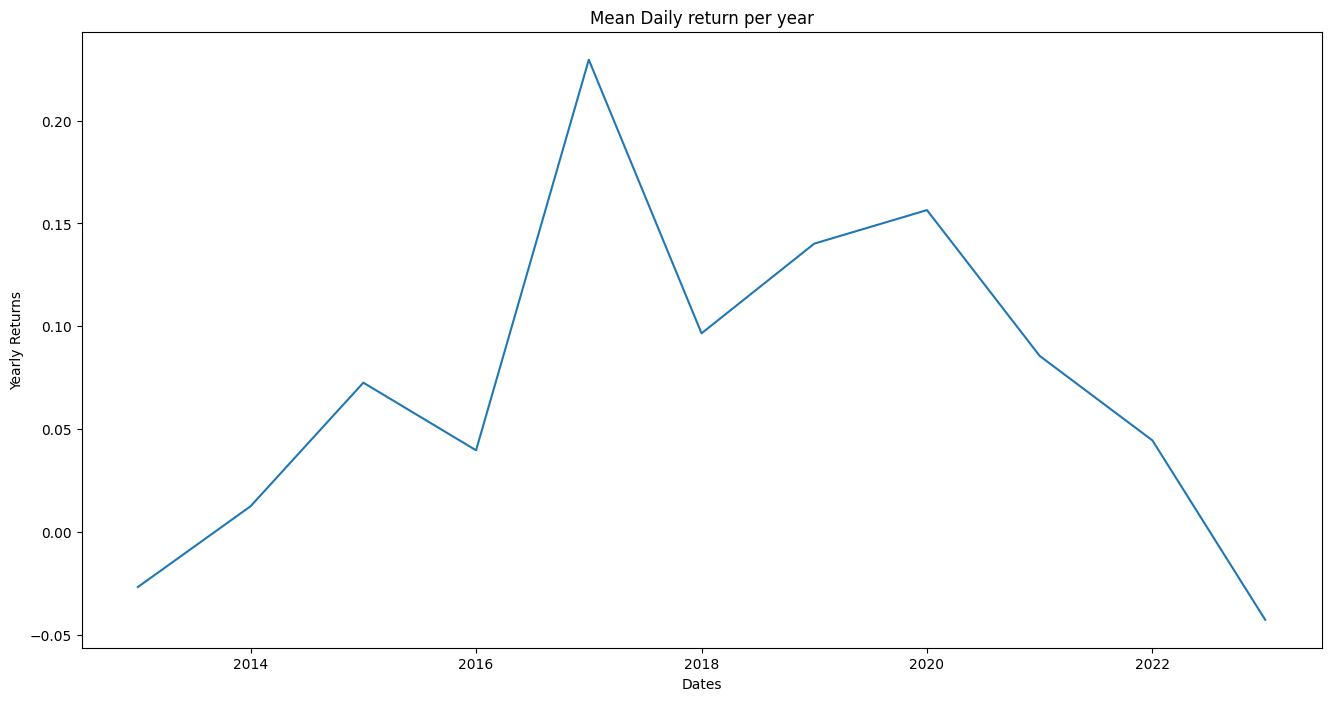

In [52]:
plt.figure(figsize=(16,8))
plt.title('Mean Daily return per year')
plt.xlabel("Dates")
plt.ylabel("Yearly Returns")
plt.plot(stock.groupby(stock.Date.dt.year)['Daily_Return'].mean())
plt.show()

Text(0, 0.5, 'Profit amount')

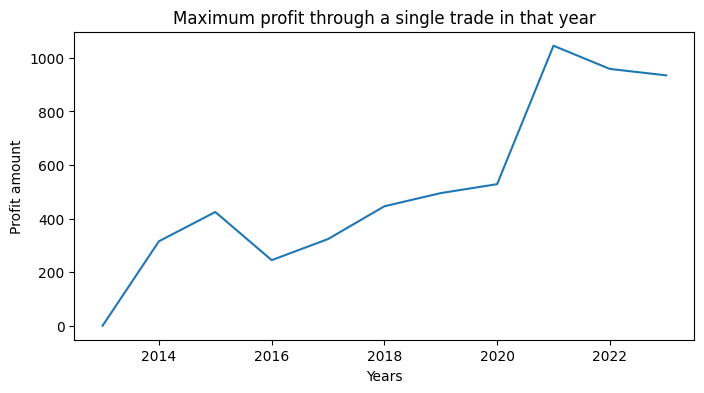

In [79]:
plt.figure(figsize=(8,4))
plt.plot(stock.groupby(stock.Date.dt.year)['profit'].max())
plt.title('Maximum profit through a single trade in that year')
plt.xlabel("Years")
plt.ylabel("Profit amount")


In [80]:
# as there is no loss in all trades done  Win/Loss ratio = infinite

In [84]:
# function for calculating maximum profit in single trade
def max_profit(df):
   max= df['profit'].max()
    
   return(max)
  

In [86]:
 
max_profit_in_trade = max_profit(stock)
max_profit_in_trade

1045.381488291575